In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
data=data.drop(columns="ocean_proximity")

In [6]:
data.fillna(data.mean(), inplace=True)

In [7]:

'''
imputer = KNNImputer()
imputed_data = imputer.fit_transform(data)  # impute all the missing data
data_temp = pd.DataFrame(imputed_data)
data_temp.columns = data.columns
data['total_bedrooms'] = data_temp['total_bedrooms']
'''

"\nimputer = KNNImputer()\nimputed_data = imputer.fit_transform(data)  # impute all the missing data\ndata_temp = pd.DataFrame(imputed_data)\ndata_temp.columns = data.columns\ndata['total_bedrooms'] = data_temp['total_bedrooms']\n"

In [8]:
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [9]:
print(data.duplicated().sum())

0


In [10]:
#Split the dataset into input features:

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [11]:
#Split the data into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Create LinearRegression model:

model = LinearRegression()

In [13]:
#fit the model to the training data

model.fit(X_train,y_train)

LinearRegression()

In [14]:
# make a prediction

y_pred = model.predict(X_test)

In [15]:
# Assess the model's performance:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print(f'score on test set: {(r2_score(y_test, y_pred))*100}%')

Mean Squared Error: 5052953703.901612
score on test set: 61.43987268246036%


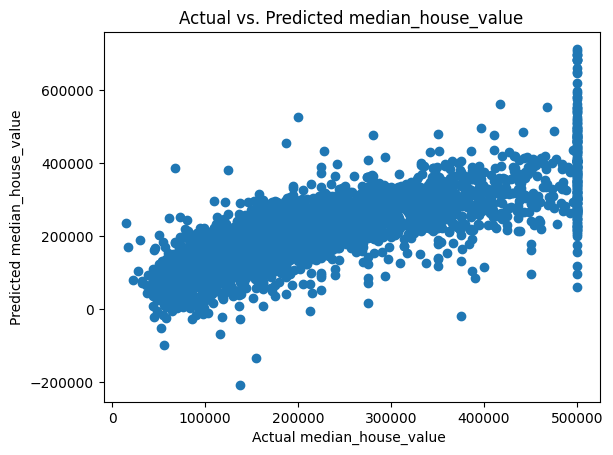

In [16]:
#Visualize the predicted values:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual median_house_value ')
plt.ylabel('Predicted median_house_value')
plt.title('Actual vs. Predicted median_house_value')
plt.show()

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
model = GradientBoostingRegressor()

In [19]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [20]:
# make a prediction

y_pred = model.predict(X_test)

In [21]:
# Assess the model's performance:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print(f'score on test set: {(r2_score(y_test, y_pred))*100}%')

Mean Squared Error: 3117524904.2722745
score on test set: 76.20952728470117%


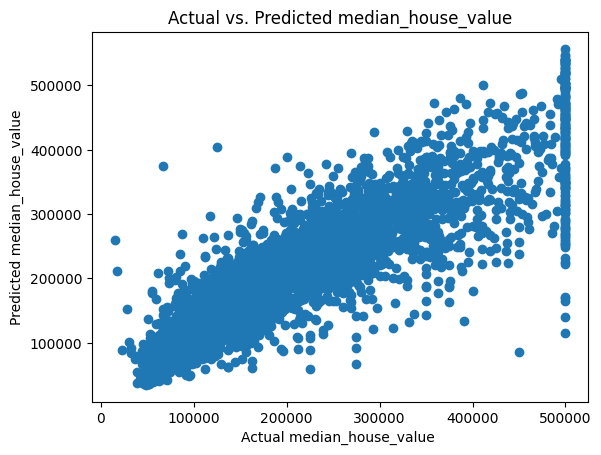

In [22]:
#Visualize the predicted values:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual median_house_value ')
plt.ylabel('Predicted median_house_value')
plt.title('Actual vs. Predicted median_house_value')
plt.show()

In [23]:
from xgboost.sklearn import XGBRegressor

In [24]:
model = XGBRegressor()

In [25]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [26]:
# make a prediction

y_pred = model.predict(X_test)

In [27]:
# Assess the model's performance:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print(f'score on test set: {(r2_score(y_test, y_pred))*100}%')

Mean Squared Error: 2300231392.9104896
score on test set: 82.44646189773263%


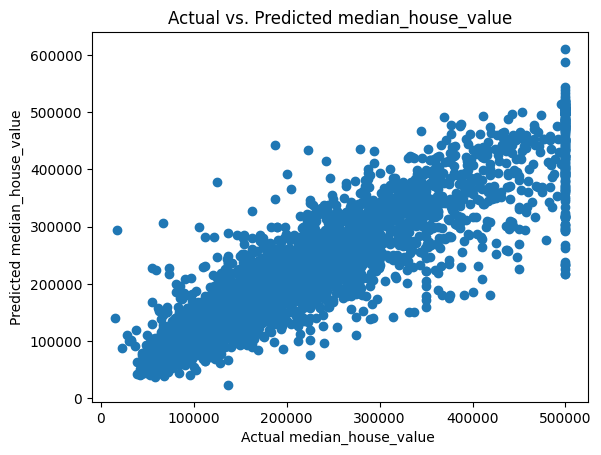

In [28]:
#Visualize the predicted values:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual median_house_value ')
plt.ylabel('Predicted median_house_value')
plt.title('Actual vs. Predicted median_house_value')
plt.show()

In [29]:
from sklearn.tree import DecisionTreeRegressor


In [58]:
model = DecisionTreeRegressor()

In [59]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [60]:
# make a prediction

y_pred = model.predict(X_test)

In [61]:
# Assess the model's performance:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print(f'score on test set: {(r2_score(y_test, y_pred))*100}%')

Mean Squared Error: 4817983809.783915
score on test set: 63.23297619456483%


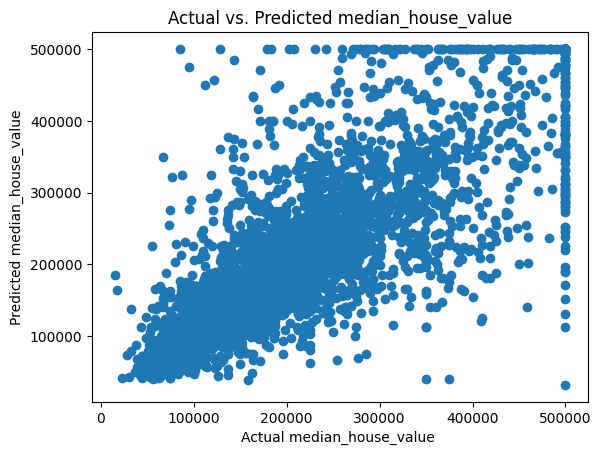

In [62]:
#Visualize the predicted values:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual median_house_value ')
plt.ylabel('Predicted median_house_value')
plt.title('Actual vs. Predicted median_house_value')
plt.show()